<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-dependencies" data-toc-modified-id="Load-dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load dependencies</a></span></li><li><span><a href="#Read-csv-files-to-DFs" data-toc-modified-id="Read-csv-files-to-DFs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read csv files to DFs</a></span></li><li><span><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fill missing values</a></span></li><li><span><a href="#Add-date-part" data-toc-modified-id="Add-date-part-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add date part</a></span></li><li><span><a href="#Add-extra-columns-(purchased-on-weekend,-monthend,-month_diff-etc." data-toc-modified-id="Add-extra-columns-(purchased-on-weekend,-monthend,-month_diff-etc.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add extra columns (purchased on weekend, monthend, month_diff etc.</a></span></li><li><span><a href="#Rolling-aggregate-on-month" data-toc-modified-id="Rolling-aggregate-on-month-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rolling aggregate on month</a></span></li><li><span><a href="#Time-between-successive-transactions" data-toc-modified-id="Time-between-successive-transactions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Time between successive transactions</a></span></li><li><span><a href="#Additional-features" data-toc-modified-id="Additional-features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Additional features</a></span></li><li><span><a href="#Latest-&amp;-First-5-col-aggregates" data-toc-modified-id="Latest-&amp;-First-5-col-aggregates-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Latest &amp; First 5 col aggregates</a></span></li><li><span><a href="#Aggregate-by-card_id" data-toc-modified-id="Aggregate-by-card_id-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Aggregate by card_id</a></span></li><li><span><a href="#Add-exta-interpreted-columns-on-aggregates" data-toc-modified-id="Add-exta-interpreted-columns-on-aggregates-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Add exta interpreted columns on aggregates</a></span></li><li><span><a href="#Aggregate-on-categories" data-toc-modified-id="Aggregate-on-categories-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Aggregate on categories</a></span></li><li><span><a href="#Aggregate-on-month" data-toc-modified-id="Aggregate-on-month-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Aggregate on month</a></span></li><li><span><a href="#Load-test-&amp;-train-DFs" data-toc-modified-id="Load-test-&amp;-train-DFs-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Load test &amp; train DFs</a></span></li><li><span><a href="#Add-observed-date" data-toc-modified-id="Add-observed-date-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Add observed date</a></span></li><li><span><a href="#Merge-train-&amp;-test-with-new-&amp;-old-transactions-history" data-toc-modified-id="Merge-train-&amp;-test-with-new-&amp;-old-transactions-history-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Merge train &amp; test with new &amp; old transactions history</a></span></li><li><span><a href="#Adding-train-days" data-toc-modified-id="Adding-train-days-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Adding train days</a></span></li><li><span><a href="#Add-extra-columns-like-age,-total-transactions,-installments,-purchase-amount,-first-buy-etc" data-toc-modified-id="Add-extra-columns-like-age,-total-transactions,-installments,-purchase-amount,-first-buy-etc-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Add extra columns like age, total transactions, installments, purchase amount, first buy etc</a></span></li><li><span><a href="#Mark-the-outliers" data-toc-modified-id="Mark-the-outliers-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Mark the outliers</a></span></li><li><span><a href="#Target-encode-the-outliers" data-toc-modified-id="Target-encode-the-outliers-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Target encode the outliers</a></span></li><li><span><a href="#Transform-purchase_value-to-actual-amount" data-toc-modified-id="Transform-purchase_value-to-actual-amount-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Transform purchase_value to actual amount</a></span></li></ul></div>

1. Load dependencies
2. Read csv files to dataframes
3. Fill missing values
4. Add date part 
5. Add extra columns (purchased on weekend, monthend, month_diff etc.
6. Aggregate by card_id
7. Aggregate by categories
8. Mark categorical columns
9. Add exta interpreted columns on aggregates
10. Load test & train csvs to dfs
11. Add date part to test & train dfs
12. Merge train & test with new & old transactions history
13. Add extra columns like age, total transactions, installments, purchase amount, first buy etc
14. Mark the outliers
15. Target encode the outliers 
16. Save to feather

### Load dependencies

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 4
%autosave 120

Autosaving every 120 seconds


In [2]:
from fastai.io import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pandas_summary import DataFrameSummary
from IPython.display import display
from sklearn import metrics
import feather
import gc

### Read csv files to DFs

In [3]:
PATH = '../data/elo/'

In [4]:
files = ['historical_transactions', 'new_merchant_transactions']

In [5]:
hist_trans, new_hist_trans = [pd.read_csv(f'{PATH}{c}.csv') for c in files]

### Fill missing values

In [6]:
def fill_nas_for_transactions_df(df):
    # Fill nas for category_3 with mode
    df['category_2'].fillna(1.0,inplace=True)
    df['category_3'].fillna('A',inplace=True)
    df['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
    df['installments'].replace(-1, np.nan,inplace=True)
    df['installments'].replace(999, np.nan,inplace=True)
    df['category_1'] = df['category_1'].map({'Y':1, 'N':0}) 
    df['category_3'] = df['category_3'].map({'A':0, 'B':1, 'C':2})
    return df

In [7]:
dfs = [hist_trans, new_hist_trans]

In [8]:
hist_trans, new_hist_trans = [fill_nas_for_transactions_df(df) for df in dfs]

### Add date part

In [9]:
add_datepart(hist_trans, 'purchase_date', drop=False, time=True)
add_datepart(new_hist_trans, 'purchase_date', drop=False, time=True)

### Add extra columns (purchased on weekend, monthend, month_diff etc.

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


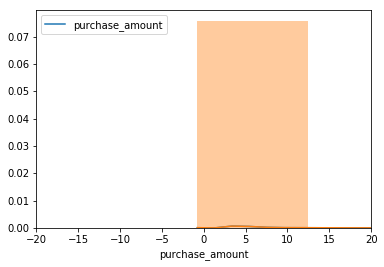

In [10]:
sns.kdeplot(new_hist_trans['purchase_amount'])
# sns.kdeplot(new_hist_trans['purchase_amount'], bw=.2, label="bw: 0.2")
# sns.kdeplot(new_hist_trans['purchase_amount'])
plt.legend();
plt.xlim(-20,20)
sns.distplot(new_hist_trans['purchase_amount'], bins=20, kde=True, rug=False);

In [11]:
def add_extra_cols(df):
    df['purchased_on_weekend'] = (df.purchase_Dayofweek >=5).astype(int)
    df['purchased_on_weekday'] = (df.purchase_Dayofweek <5).astype(int)
    df['month_diff'] = ((datetime.datetime.today() - df['purchase_date']).dt.days)//30
    df['month_diff'] += df['month_lag']
    df['authorized_flag'] = df['authorized_flag'].map({'Y':1, 'N':0})
#     Trim the purchase_amount
#     df['purchase_amount'] = df['purchase_amount'].apply(lambda x: min(x, 0.8)) 
    return df

In [12]:
hist_trans, new_hist_trans = [add_extra_cols(df) for df in dfs]

In [33]:
hist_trans.shape, new_hist_trans.shape

((29112361, 42), (1963031, 52))

### Rolling aggregate on month

In [15]:
new_hist_trans['purchase_amount'] = np.round(new_hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)
hist_trans['purchase_amount'] = np.round(hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)

In [16]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_diff'])['purchase_amount']

    agg_func = {
            'purchase_amount': ['count', 'sum', 'max', 'mean'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'sum', np.ptp, 'max'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

### Time between successive transactions

In [17]:
def time_diff(df):
    df['purchase_date_successive_diff'] = df.sort_values('purchase_date').groupby('card_id')['purchase_date'].diff().dt.total_seconds()
    df['purchase_date_successive_diff'].fillna(0, inplace=True)
    return df

In [32]:
gc.collect()

8

In [19]:
hist_trans, new_hist_trans = [time_diff(df) for df in dfs]

In [20]:
hist_trans.to_feather('hist_trans_beta')
new_hist_trans.to_feather('new_hist_trans_beta')

In [3]:
hist_trans = feather.read_dataframe('hist_trans_beta')
# new_hist_trans = feather.read_dataframe('new_hist_trans_beta')

In [36]:
dfs = [hist_trans, new_hist_trans]

### Additional features

In [37]:
def additional_feats(hist_df):
    hist_df['price'] = hist_df['purchase_amount'] / hist_df['installments']
    #Christmas : December 25 2017
    hist_df['Christmas_Day_2017']=(pd.to_datetime('2017-12-25')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Mothers Day: May 14 2017
    hist_df['Mothers_Day_2017']=(pd.to_datetime('2017-06-04')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #fathers day: August 13 2017
    hist_df['fathers_day_2017']=(pd.to_datetime('2017-08-13')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Childrens day: October 12 2017
    hist_df['Children_day_2017']=(pd.to_datetime('2017-10-12')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Valentine's Day : 12th June, 2017
    hist_df['Valentine_Day_2017']=(pd.to_datetime('2017-06-12')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Black Friday : 24th November 2017
    hist_df['Black_Friday_2017']=(pd.to_datetime('2017-11-24') - hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #2018
    #Mothers Day: May 13 2018
    hist_df['Mothers_Day_2018']=(pd.to_datetime('2018-05-13')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    hist_df['duration'] = hist_df['purchase_amount']*hist_df['month_diff']
    hist_df['amount_month_ratio'] = hist_df['purchase_amount']/hist_df['month_diff']
    return hist_df

In [38]:
hist_trans, new_hist_trans = [additional_feats(df) for df in dfs]

In [39]:
hist_trans.shape, new_hist_trans.shape

((29112361, 52), (1963031, 52))

### Latest & First 5 col aggregates

In [6]:
def head_sum(x):
    return x.head().sum()

def head_max(x):
    return x.head().max()

def tail_sum(x):
    return x.tail().sum()

def tail_max(x):
    return x.tail().max()

In [27]:
gc.collect()

334

In [28]:
%time new_hist_trans = new_hist_trans.sort_values('purchase_date')

CPU times: user 1.9 s, sys: 1.55 s, total: 3.45 s
Wall time: 1.14 s


In [ ]:
gc.collect()

In [5]:
%time hist_trans = hist_trans.sort_values('purchase_date')

CPU times: user 24 s, sys: 1.53 s, total: 25.6 s
Wall time: 23.2 s


In [35]:
# hist_trans.head()

In [37]:
new_hist_trans = new_hist_trans.reset_index().drop('index', axis=1)

In [7]:
hist_trans.reset_index(inplace=True)

In [40]:
# hist_trans.drop('index', axis=1, inplace=True)

In [4]:
# hist_trans.head()

In [11]:
# hist_trans.drop('level_0', axis=1, inplace=True)

In [41]:
hist_trans.to_feather('hist_trans_beta')
new_hist_trans.to_feather('new_hist_trans_beta')

In [4]:
hist_trans = feather.read_dataframe('hist_trans_beta')
new_hist_trans = feather.read_dataframe('new_hist_trans_beta')

### Aggregate by card_id

In [9]:
hist_trans['purchase_date'].head()

0   2017-01-01 00:00:08
1   2017-01-01 00:00:59
2   2017-01-01 00:01:41
3   2017-01-01 00:02:03
4   2017-01-01 00:02:12
Name: purchase_date, dtype: datetime64[ns]

In [10]:
new_hist_trans['purchase_date'].head()

0   2017-03-01 03:24:51
1   2017-03-01 11:01:06
2   2017-03-01 11:27:39
3   2017-03-01 11:55:11
4   2017-03-01 12:37:26
Name: purchase_date, dtype: datetime64[ns]

In [5]:
hist_trans.shape, new_hist_trans.shape

((29112361, 52), (1963031, 52))

In [7]:
def aggregate_hist_trans(df):
    unique_cols = ['subsector_id', 'merchant_id', 'merchant_category_id']

    col_seas = ['purchase_Month','purchase_Week', 'purchase_Dayofweek', 'purchase_Day', 'purchase_Hour']

    aggs = {}
    for c in unique_cols:
        aggs[c] = ['nunique'] 
    for c in col_seas:
        aggs[c] = ['nunique', 'mean', 'min', 'max']
   
    aggs['purchase_amount'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max)]
    aggs['installments'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max)]
    aggs['purchase_date'] = ['max','min']
    aggs['month_lag'] = ['max','min','mean','var','skew']
    aggs['month_diff'] = ['max','min','mean','var','skew']
    aggs['authorized_flag'] = ['mean']
    aggs['purchased_on_weekend'] = ['mean'] # overwrite
    aggs['purchase_Dayofweek'] = ['mean'] # overwrite
    aggs['purchase_Day'] = ['nunique', 'mean', 'min'] # overwrite
    aggs['category_1'] = ['mean']
    aggs['category_2'] = ['mean']
    aggs['category_3'] = ['mean']
    aggs['card_id'] = ['size','count']
    aggs['price'] = ['sum','mean','max','min','var', 'skew']
    aggs['Christmas_Day_2017'] = ['mean']
    aggs['Mothers_Day_2017'] = ['mean']
    aggs['fathers_day_2017'] = ['mean']
    aggs['Children_day_2017'] = ['mean']
    aggs['Valentine_Day_2017'] = ['mean']
    aggs['Black_Friday_2017'] = ['mean']
    aggs['Mothers_Day_2018'] = ['mean']
    aggs['duration']=['mean','min','max','var','skew']
    aggs['amount_month_ratio']=['mean','min','max','var','skew']
    
    #exta
    aggs['purchase_date_successive_diff'] = ['mean']

#     aggs['purchase_date_successive_diff'] = ['mean', 'median', 'max', 'min', 'var', 'skew']
    for col in ['category_2','category_3']:
        df[col+'_mean'] = df.groupby([col])['purchase_amount'].transform('mean')
        df[col+'_min'] = df.groupby([col])['purchase_amount'].transform('min')
        df[col+'_max'] = df.groupby([col])['purchase_amount'].transform('max')
        df[col+'_sum'] = df.groupby([col])['purchase_amount'].transform('sum')
        aggs[col+'_mean'] = ['mean']

    new_df = df.groupby(['card_id']).agg(aggs)
    new_df.columns = ['_'.join(col).strip() for col in new_df.columns.values]
    new_df.reset_index(inplace=True)
    other_df = (df.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    new_df = pd.merge(other_df, new_df, on='card_id', how='left')

    new_df['purchase_date_diff'] = (new_df['purchase_date_max'] - new_df['purchase_date_min']).dt.days
    new_df['purchase_date_average'] = new_df['purchase_date_diff']/new_df['card_id_size']
    new_df['purchase_date_uptonow'] = (datetime.datetime.today() - new_df['purchase_date_max']).dt.days
    new_df['purchase_date_uptomin'] = (datetime.datetime.today() - new_df['purchase_date_min']).dt.days
    return new_df

In [8]:
def aggregate_new_trans(df):
    unique_cols = ['subsector_id', 'merchant_id', 'merchant_category_id']

    col_seas = ['purchase_Month', 'purchase_Week', 'purchase_Dayofweek','purchase_Day', 'purchase_Hour']

    aggs = {}
    for c in unique_cols:
        aggs[c] = ['nunique'] 
    for c in col_seas:
        aggs[c] = ['nunique', 'mean', 'min', 'max']
        
    aggs['purchase_amount'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max)]
    aggs['installments'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max)]
    aggs['purchase_date'] = ['max','min']
    aggs['month_lag'] = ['max','min','mean','var','skew']
    aggs['month_diff'] = ['mean','var','skew']
    aggs['purchased_on_weekend'] = ['mean']
    aggs['purchase_Month'] = ['mean', 'min', 'max']
    aggs['purchase_Dayofweek'] = ['mean', 'min', 'max']
    aggs['category_1'] = ['mean']
    aggs['category_2'] = ['mean']
    aggs['category_3'] = ['mean']
    aggs['card_id'] = ['size','count']
    aggs['price'] = ['mean','max','min','var']
    aggs['Christmas_Day_2017'] = ['mean']
    aggs['Children_day_2017'] = ['mean']
    aggs['Black_Friday_2017'] = ['mean']
    aggs['Mothers_Day_2018'] = ['mean']
    aggs['duration']=['mean','min','max','var','skew']
    aggs['amount_month_ratio']=['mean','min','max','var','skew']
    
    #extra
    aggs['purchase_date_successive_diff'] = ['mean']
    
#     aggs['purchase_date_successive_diff'] = ['mean', 'median', 'max', 'min', 'var', 'skew']
    for col in ['category_2','category_3']:
        df[col+'_mean'] = df.groupby([col])['purchase_amount'].transform('mean')
        df[col+'_min'] = df.groupby([col])['purchase_amount'].transform('min')
        df[col+'_max'] = df.groupby([col])['purchase_amount'].transform('max')
        df[col+'_sum'] = df.groupby([col])['purchase_amount'].transform('sum')
        aggs[col+'_mean'] = ['mean']

    new_df = df.groupby(['card_id']).agg(aggs)
    new_df.columns = ['_'.join(col).strip() for col in new_df.columns.values]
    new_df.reset_index(inplace=True)
    other_df = (df.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    new_df = pd.merge(other_df, new_df, on='card_id', how='left')

    new_df['purchase_date_diff'] = (new_df['purchase_date_max'] - new_df['purchase_date_min']).dt.days
    new_df['purchase_date_average'] = new_df['purchase_date_diff']/new_df['card_id_size']
    new_df['purchase_date_uptonow'] = (datetime.datetime.today() - new_df['purchase_date_max']).dt.days
    new_df['purchase_date_uptomin'] = (datetime.datetime.today() - new_df['purchase_date_min']).dt.days
    return new_df

In [9]:
import gc
gc.collect()

0

In [10]:
%time hist_trans_agg = aggregate_hist_trans(hist_trans)

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


CPU times: user 12min 27s, sys: 10.4 s, total: 12min 37s
Wall time: 11min 36s


In [11]:
%time new_hist_trans_agg = aggregate_new_trans(new_hist_trans)

CPU times: user 7min 52s, sys: 16.4 s, total: 8min 8s
Wall time: 7min 44s


In [12]:
gc.collect()

142

### Add exta interpreted columns on aggregates

In [13]:
def add_extra_cols_on_agg(df):
    df['inverse_avg_transactions_per_day'] = df['purchase_date_diff']/df['card_id_size']
    df['days_since_last_transaction'] = (datetime.datetime.today() - df['purchase_date_max']).dt.days
    df['repurchase_merchant_rate'] = df['transactions_count']/df['merchant_id_nunique']
    df['merchant_category_repurchase'] = df['merchant_category_id_nunique']/df['merchant_id_nunique']
    df['avg_spend_per_merchant'] = df['purchase_amount_sum']/df['merchant_id_nunique']
    df['avg_trans_per_merchant'] = df['transactions_count']/df['merchant_id_nunique']
    df['avg_spend_per_transaction'] = df['purchase_amount_sum']/df['transactions_count']
    return df

In [14]:
[hist_trans_agg, new_hist_trans_agg] = [add_extra_cols_on_agg(df) for df in [hist_trans_agg, 
                                                                             new_hist_trans_agg]]

In [15]:
hist_trans_agg.to_feather('hist_trans_agg_beta')
new_hist_trans_agg.to_feather('new_hist_trans_agg_beta')

In [16]:
hist_trans_agg = feather.read_dataframe('hist_trans_agg_beta')
new_hist_trans_agg = feather.read_dataframe('new_hist_trans_agg_beta')

In [17]:
hist_trans_agg.shape, new_hist_trans_agg.shape

((325540, 103), (290001, 97))

### Aggregate on categories

In [18]:
def agg_on_cat(df, category, feature):
    temp_df = df.pivot_table(index='card_id', columns=category, aggfunc={feature: ['sum', 'mean']})
    cols = [category + '_{0[2]}_{0[0]}_{0[1]}'.format(col) for col in temp_df.columns.tolist()]
    temp_df.columns = cols
    return temp_df

In [19]:
def get_cat_agg(df):
    agg_df = agg_on_cat(df, 'category_1', 'purchase_amount')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'category_2', 'purchase_amount'), on='card_id', how='left')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'category_3', 'purchase_amount'), on='card_id', how='left')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'authorized_flag', 'purchase_amount'), on='card_id', how='left')
    return agg_df

In [20]:
%time hist_trans_agg_cat, new_hist_trans_agg_cat = [get_cat_agg(df) for df in [hist_trans, new_hist_trans]]

CPU times: user 30.4 s, sys: 9.67 s, total: 40.1 s
Wall time: 27.9 s


In [21]:
hist_trans_agg_cat.shape, new_hist_trans_agg_cat.shape

((325540, 24), (290001, 22))

In [54]:
new_hist_trans_agg_cat.head().T

card_id,C_ID_00007093c1,C_ID_0001238066,C_ID_0001506ef0,C_ID_0001793786,C_ID_000183fdda
category_1_0_purchase_amount_mean,-0.664262,-0.564558,-0.723677,-0.007407,-0.599162
category_1_1_purchase_amount_mean,NaN,-0.650332,NaN,NaN,NaN
category_1_0_purchase_amount_sum,-1.328524,-13.549391,-1.447354,-0.229620,-6.590778
category_1_1_purchase_amount_sum,NaN,-1.300665,NaN,NaN,NaN
category_2_1.0_purchase_amount_mean,-0.656749,-0.580966,NaN,0.139747,NaN
category_2_2.0_purchase_amount_mean,NaN,NaN,NaN,-0.344766,NaN
category_2_3.0_purchase_amount_mean,-0.671775,NaN,-0.723677,0.102887,-0.599162
category_2_4.0_purchase_amount_mean,NaN,NaN,NaN,NaN,NaN
category_2_5.0_purchase_amount_mean,NaN,-0.495945,NaN,-0.361628,NaN
category_2_1.0_purchase_amount_sum,-0.656749,-13.362220,NaN,2.375707,NaN


In [22]:
hist_trans_agg_cat.reset_index().to_feather('hist_trans_agg_cat')
new_hist_trans_agg_cat.reset_index().to_feather('new_hist_trans_agg_cat')

In [23]:
hist_trans_agg_cat = feather.read_dataframe('hist_trans_agg_cat')
new_hist_trans_agg_cat = feather.read_dataframe('new_hist_trans_agg_cat')

### Aggregate on month

In [33]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_diff'])['purchase_amount']

    agg_func = {
            'purchase_amount': ['count', 'sum', 'max', 'mean'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_month_diff_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)
    
    return intermediate_group

In [35]:
# aggregate_per_month(new_hist_trans)

In [36]:
%time hist_trans_agg_month, new_hist_trans_agg_month = [aggregate_per_month(df) for df in [hist_trans, new_hist_trans]]

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


CPU times: user 3min 36s, sys: 12.5 s, total: 3min 49s
Wall time: 3min 29s


In [37]:
hist_trans_agg_month.shape, new_hist_trans_agg_month.shape

((618851, 6), (431268, 6))

In [38]:
new_hist_trans_agg_month.head().T

,0,1,2,3,4
card_id,C_ID_00007093c1,C_ID_0001238066,C_ID_0001238066,C_ID_0001506ef0,C_ID_0001793786
month_diff,12,11,12,12,15
purchase_amount_month_diff_count,2,5,21,2,18
purchase_amount_month_diff_sum,110,857.42,2183.57,30.92,12340.8
purchase_amount_month_diff_max,60,250,444.94,21,2580
purchase_amount_month_diff_mean,55,171.484,103.98,15.46,685.599


In [ ]:
# for df in [hist_trans_agg_month, new_hist_trans_agg_month]:
#     df.drop(['month_diff_mean', 'month_diff_sum', 'month_diff_ptp', 'month_diff_max'], axis=1, inplace=True)

In [39]:
hist_trans_agg_month.to_feather('hist_trans_agg_month')
new_hist_trans_agg_month.to_feather('new_hist_trans_agg_month')

In [40]:
new_hist_trans_agg_month = feather.read_dataframe('new_hist_trans_agg_month')
hist_trans_agg_month = feather.read_dataframe('hist_trans_agg_month')

### Load test & train DFs

In [41]:
PATH = 'data/elo/'

In [42]:
train, test = [pd.read_csv(f'{PATH}{c}') for c in ['train.csv', 'test.csv']]

### Add observed date

In [43]:
last_hist_transaction = hist_trans.groupby('card_id').agg({'month_lag' : 'max', 'purchase_date' : 'max'}).reset_index()
last_hist_transaction.columns = ['card_id', 'hist_month_lag', 'hist_purchase_date']
first_new_transaction = new_hist_trans.groupby('card_id').agg({'month_lag' : 'min', 'purchase_date' : 'min'}).reset_index()
first_new_transaction.columns = ['card_id', 'new_month_lag', 'new_purchase_date']

In [44]:
last_hist_transaction['hist_purchase_date'] = pd.to_datetime(last_hist_transaction['hist_purchase_date']) 
first_new_transaction['new_purchase_date'] = pd.to_datetime(first_new_transaction['new_purchase_date']) 

In [45]:
last_hist_transaction['observation_date'] = \
    last_hist_transaction.apply(lambda x: x['hist_purchase_date']  - pd.DateOffset(months=x['hist_month_lag']), axis=1)

first_new_transaction['observation_date'] = \
    first_new_transaction.apply(lambda x: x['new_purchase_date']  - pd.DateOffset(months=x['new_month_lag']-1), axis=1)

In [32]:
# last_hist_transaction.head(5)

In [33]:
# first_new_transaction.head()

In [46]:
last_hist_transaction['observation_date'] = last_hist_transaction['observation_date'].dt.to_period('M').dt.to_timestamp() + pd.DateOffset(months=1)
first_new_transaction['observation_date'] = first_new_transaction['observation_date'].dt.to_period('M').dt.to_timestamp()

In [47]:
# last_hist_transaction.head()

In [48]:
# first_new_transaction.head()

In [49]:
first_new_transaction.drop(['new_month_lag', 'new_purchase_date'], axis=1, inplace=True)
last_hist_transaction.drop(['hist_month_lag', 'hist_purchase_date'], axis=1, inplace=True)

In [50]:
validate = last_hist_transaction.merge(first_new_transaction, on = 'card_id')
all(validate['observation_date_x'] == validate['observation_date_y'])

True

In [51]:
hist_trans_agg_cat.shape, hist_trans_agg_month.shape, hist_trans_agg.shape

((325540, 25), (618851, 6), (325540, 103))

In [52]:
new_hist_trans_agg.shape, new_hist_trans_agg_month.shape, new_hist_trans_agg_cat.shape

((290001, 97), (431268, 6), (290001, 23))

In [53]:
pd.set_option('display.max_rows', 500)

In [55]:
new_hist_trans_agg_cat.head().T

,0,1,2,3,4
card_id,C_ID_00007093c1,C_ID_0001238066,C_ID_0001506ef0,C_ID_0001793786,C_ID_000183fdda
category_1_0_purchase_amount_mean,55,121.352,15.46,492.131,98.3236
category_1_1_purchase_amount_mean,NaN,64.27,NaN,NaN,NaN
category_1_0_purchase_amount_sum,110,2912.45,30.92,15256.1,1081.56
category_1_1_purchase_amount_sum,NaN,128.54,NaN,NaN,NaN
category_2_1.0_purchase_amount_mean,60,110.433,NaN,590.061,NaN
category_2_2.0_purchase_amount_mean,NaN,NaN,NaN,267.621,NaN
category_2_3.0_purchase_amount_mean,50,NaN,15.46,565.53,98.3236
category_2_4.0_purchase_amount_mean,NaN,NaN,NaN,NaN,NaN
category_2_5.0_purchase_amount_mean,NaN,167.013,NaN,256.4,NaN


In [12]:
hist_trans_agg_cat.head(1).T

,0
card_id,C_ID_00007093c1
category_1_0_purchase_amount_mean,-0.469471
category_1_1_purchase_amount_mean,-0.71568
category_1_0_purchase_amount_sum,-56.806
category_1_1_purchase_amount_sum,-20.039
category_2_1.0_purchase_amount_mean,-0.71568
category_2_2.0_purchase_amount_mean,NaN
category_2_3.0_purchase_amount_mean,-0.470114
category_2_4.0_purchase_amount_mean,NaN
category_2_5.0_purchase_amount_mean,-0.392282


In [80]:
hist_trans_agg.shape, hist_trans_agg_cat.shape, last_hist_transaction.shape, hist_trans_agg_month.shape

((325540, 103), (325540, 25), (325540, 2), (618851, 6))

### Merge train & test with new & old transactions history

In [100]:
def join_dfs(left, right, left_on, right_on=None, suffix='_old'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, suffixes=("", suffix))

In [101]:
train.shape, test.shape

((201917, 6), (123623, 5))

In [102]:
train_df = join_dfs(train, new_hist_trans_agg, left_on='card_id')

In [103]:
train_df = join_dfs(train_df, hist_trans_agg, left_on='card_id', suffix='_old')
# train_df = join_dfs(train_df, hist_trans_agg_month, left_on='card_id', suffix='_old')
train_df = join_dfs(train_df, hist_trans_agg_cat, left_on='card_id', suffix='_old')
train_df = join_dfs(train_df, last_hist_transaction, left_on='card_id', suffix='_old')
# train_df = join_dfs(train_df, new_hist_trans_agg_month, left_on='card_id')
train_df = join_dfs(train_df, new_hist_trans_agg_cat, left_on='card_id')
train_df = join_dfs(train_df, first_new_transaction, left_on='card_id')

In [104]:
test_df = join_dfs(test, new_hist_trans_agg, left_on='card_id')
test_df = join_dfs(test_df, first_new_transaction, left_on='card_id')
# test_df = join_dfs(test_df, new_hist_trans_agg_month, left_on='card_id')
test_df = join_dfs(test_df, new_hist_trans_agg_cat, left_on='card_id')
# test_df = join_dfs(test_df, hist_trans_agg_month, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, hist_trans_agg_cat, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, hist_trans_agg, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, last_hist_transaction, left_on='card_id', suffix='_old')

In [105]:
test_df.shape, train_df.shape

((123623, 251), (201917, 252))

### Adding train days

In [106]:
train_df[['observation_date']].isnull().sum().sort_values(ascending=False)*100/len(train_df)

observation_date    0.0
dtype: float64

In [107]:
# train_df[['observation_date_old', 'observation_date']].head()

In [108]:
# hist_trans_agg_cat.head()

In [109]:
for df in [train_df, test_df]:
    df.drop('observation_date', axis=1, inplace=True)

In [110]:
def add_days_feature_interaction(df):
    # to datetime
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['observation_date_old'] = pd.to_datetime(df['observation_date_old'])
    # datetime features
    df['quarter'] = df['first_active_month'].dt.quarter
#     df['elapsed_time'] = (datetime.datetime.today() - df['first_active_month']).dt.days
    df['observed_elapsed_time'] = (df['observation_date_old'] - df['first_active_month']).dt.days
    df['days_feature1'] = df['observed_elapsed_time'] * df['feature_1']
    df['days_feature2'] = df['observed_elapsed_time'] * df['feature_2']
    df['days_feature3'] = df['observed_elapsed_time'] * df['feature_3']

    df['days_feature1_ratio'] = df['feature_1'] / df['observed_elapsed_time']
    df['days_feature2_ratio'] = df['feature_2'] / df['observed_elapsed_time']
    df['days_feature3_ratio'] = df['feature_3'] / df['observed_elapsed_time']
    
    df['feature_sum'] = df['feature_1'] + df['feature_2'] + df['feature_3']
    df['feature_mean'] = df['feature_sum']/3
    df['feature_max'] = df[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
    df['feature_min'] = df[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
    df['feature_var'] = df[['feature_1', 'feature_2', 'feature_3']].std(axis=1)
    return df

In [111]:
train_df, test_df = [add_days_feature_interaction(d) for d in [train_df, test_df]]

### Add extra columns like age, total transactions, installments, purchase amount, first buy etc

In [112]:
train_df.shape, test_df.shape

((201917, 264), (123623, 263))

In [113]:
gc.collect()

310

In [69]:
# train_df[['elapsed_time','observed_elapsed_time']]

In [70]:
# train_df = train_df.loc[:,~train_df.columns.duplicated()]
# test_df = test_df.loc[:,~test_df.columns.duplicated()]

In [114]:
for df in [train_df, test_df]:
    df['card_id_total'] = df['card_id_size']+df['card_id_size_old']
    df['card_id_count_total'] = df['card_id_count']+df['card_id_count_old']
    df['card_id_count_ratio'] = df['card_id_count'] / df['card_id_count_old']
    df['purchase_amount_total'] = df['purchase_amount_sum_old']+df['purchase_amount_sum']
    df['purchase_amount_total_mean'] = df['purchase_amount_mean']+df['purchase_amount_mean_old']
    df['purchase_amount_total_max'] = df['purchase_amount_max']+df['purchase_amount_max_old']
    df['purchase_amount_total_min'] = df['purchase_amount_min']+df['purchase_amount_min_old']
    df['purchase_amount_sum_ratio'] = df['purchase_amount_sum'] / df['purchase_amount_sum_old']
    df['hist_first_buy'] = (df['purchase_date_min_old'] - df['first_active_month']).dt.days
    df['new_first_buy'] = (df['purchase_date_min'] - df['first_active_month']).dt.days
    df['hist_last_buy'] = (df['purchase_date_max_old'] - df['first_active_month']).dt.days
    df['new_last_buy'] = (df['purchase_date_max'] - df['first_active_month']).dt.days
    df['avg_spend_per_transaction'] = df['purchase_amount_total']/df['card_id_total']
    df['purchased_before_issue'] = df['hist_first_buy'] < 0
    df['month_diff_mean_total'] = df['month_diff_mean']+df['month_diff_mean_old']
    df['month_diff_ratio'] = df['month_diff_mean']/df['month_diff_mean_old']
    df['month_lag_mean_total'] = df['month_lag_mean']+df['month_lag_mean_old']
    df['month_lag_max_total'] = df['month_lag_max']+df['month_lag_max_old']
    df['month_lag_min_total'] = df['month_lag_min']+df['month_lag_min_old']
    df['category_1_mean_total'] = df['category_1_mean']+df['category_1_mean_old']
    df['installments_total'] = df['installments_sum']+df['installments_sum_old']
    df['installments_mean_total'] = df['installments_mean']+df['installments_mean_old']
    df['installments_max_total'] = df['installments_max']+df['installments_max_old']
    df['installments_ratio'] = df['installments_sum']/df['installments_sum_old']
    df['price_total'] = df['purchase_amount_total'] / df['installments_total']
    df['price_mean'] = df['purchase_amount_mean'] / df['installments_mean']
    df['price_max'] = df['purchase_amount_max'] / df['installments_max']
    df['duration_mean_total'] = df['duration_mean']+df['duration_mean_old']
    df['duration_min_total'] = df['duration_min']+df['duration_min_old']
    df['duration_max_total'] = df['duration_max']+df['duration_max_old']
    df['amount_month_ratio_mean_total']=df['amount_month_ratio_mean']+df['amount_month_ratio_mean_old']
    df['amount_month_ratio_min_total']=df['amount_month_ratio_min']+df['amount_month_ratio_min_old']
    df['amount_month_ratio_max_total']=df['amount_month_ratio_max']+df['amount_month_ratio_max_old']
    df['CLV'] = df['card_id_count'] * df['purchase_amount_sum'] / df['month_diff_mean']
    df['CLV_old'] = df['card_id_count_old'] * df['purchase_amount_sum_old'] / df['month_diff_mean_old']
    df['CLV_ratio'] = df['CLV'] / df['CLV_old']
    df['category_1_0_purchase_amount_mean_total'] = df['category_1_0_purchase_amount_mean'] + df['category_1_0_purchase_amount_mean_old']
    df['category_1_1_purchase_amount_mean_total'] = df['category_1_1_purchase_amount_mean'] + df['category_1_1_purchase_amount_mean_old']
    df['category_1_0_purchase_amount_sum_total'] = df['category_1_0_purchase_amount_sum'] + df['category_1_0_purchase_amount_sum_old']
    df['category_1_1_purchase_amount_sum_total'] = df['category_1_1_purchase_amount_sum'] + df['category_1_1_purchase_amount_sum_old']
    df['category_2_1.0_purchase_amount_mean_total'] = df['category_2_1.0_purchase_amount_mean'] + df['category_2_1.0_purchase_amount_mean_old']
    df['category_2_2.0_purchase_amount_mean_total'] = df['category_2_2.0_purchase_amount_mean'] + df['category_2_2.0_purchase_amount_mean_old']
    df['category_2_3.0_purchase_amount_mean_total'] = df['category_2_3.0_purchase_amount_mean'] + df['category_2_3.0_purchase_amount_mean_old']
    df['category_2_4.0_purchase_amount_mean_total'] = df['category_2_4.0_purchase_amount_mean'] + df['category_2_4.0_purchase_amount_mean_old']
    df['category_2_5.0_purchase_amount_mean_total'] = df['category_2_5.0_purchase_amount_mean'] + df['category_2_5.0_purchase_amount_mean_old']
    df['category_2_1.0_purchase_amount_sum_total'] = df['category_2_1.0_purchase_amount_sum'] + df['category_2_1.0_purchase_amount_sum_old']
    df['category_2_2.0_purchase_amount_sum_total'] = df['category_2_2.0_purchase_amount_sum'] + df['category_2_2.0_purchase_amount_sum_old']
    df['category_2_3.0_purchase_amount_sum_total'] = df['category_2_3.0_purchase_amount_sum'] + df['category_2_3.0_purchase_amount_sum_old']
    df['category_2_4.0_purchase_amount_sum_total'] = df['category_2_4.0_purchase_amount_sum'] + df['category_2_4.0_purchase_amount_sum_old']
    df['category_2_5.0_purchase_amount_sum_total'] = df['category_2_5.0_purchase_amount_sum'] + df['category_2_5.0_purchase_amount_sum_old']
    df['category_3_0_purchase_amount_mean_total'] = df['category_3_0_purchase_amount_mean'] + df['category_3_0_purchase_amount_mean_old']
    df['category_3_1_purchase_amount_mean_total'] = df['category_3_1_purchase_amount_mean'] + df['category_3_1_purchase_amount_mean_old']
    df['category_3_2_purchase_amount_mean_total'] = df['category_3_2_purchase_amount_mean'] + df['category_3_2_purchase_amount_mean_old']
    df['category_3_0_purchase_amount_sum_total'] = df['category_3_0_purchase_amount_sum'] + df['category_3_0_purchase_amount_sum_old']
    df['category_3_1_purchase_amount_sum_total'] = df['category_3_1_purchase_amount_sum'] + df['category_3_1_purchase_amount_sum_old']
    df['category_3_2_purchase_amount_sum_total'] = df['category_3_2_purchase_amount_sum'] + df['category_3_2_purchase_amount_sum_old']
    df['category_1_0_purchase_amount_mean_ratio']  = df['category_1_0_purchase_amount_mean'] / df['category_1_0_purchase_amount_mean_old']
    df['category_1_1_purchase_amount_mean_ratio']  = df['category_1_1_purchase_amount_mean'] / df['category_1_1_purchase_amount_mean_old']
    df['category_1_0_purchase_amount_sum_ratio']  = df['category_1_0_purchase_amount_sum'] / df['category_1_0_purchase_amount_sum_old']
    df['category_1_1_purchase_amount_sum_ratio']  = df['category_1_1_purchase_amount_sum'] / df['category_1_1_purchase_amount_sum_old']
    df['category_2_1.0_purchase_amount_mean_ratio']  = df['category_2_1.0_purchase_amount_mean'] / df['category_2_1.0_purchase_amount_mean_old']
    df['category_2_2.0_purchase_amount_mean_ratio']  = df['category_2_2.0_purchase_amount_mean'] / df['category_2_2.0_purchase_amount_mean_old']
    df['category_2_3.0_purchase_amount_mean_ratio']  = df['category_2_3.0_purchase_amount_mean'] / df['category_2_3.0_purchase_amount_mean_old']
    df['category_2_4.0_purchase_amount_mean_ratio']  = df['category_2_4.0_purchase_amount_mean'] / df['category_2_4.0_purchase_amount_mean_old']
    df['category_2_5.0_purchase_amount_mean_ratio']  = df['category_2_5.0_purchase_amount_mean'] / df['category_2_5.0_purchase_amount_mean_old']
    df['category_2_1.0_purchase_amount_sum_ratio']  = df['category_2_1.0_purchase_amount_sum'] / df['category_2_1.0_purchase_amount_sum_old']
    df['category_2_2.0_purchase_amount_sum_ratio']  = df['category_2_2.0_purchase_amount_sum'] / df['category_2_2.0_purchase_amount_sum_old']
    df['category_2_3.0_purchase_amount_sum_ratio']  = df['category_2_3.0_purchase_amount_sum'] / df['category_2_3.0_purchase_amount_sum_old']
    df['category_2_4.0_purchase_amount_sum_ratio']  = df['category_2_4.0_purchase_amount_sum'] / df['category_2_4.0_purchase_amount_sum_old']
    df['category_2_5.0_purchase_amount_sum_ratio']  = df['category_2_5.0_purchase_amount_sum'] / df['category_2_5.0_purchase_amount_sum_old']
    df['category_3_0_purchase_amount_mean_ratio']  = df['category_3_0_purchase_amount_mean'] / df['category_3_0_purchase_amount_mean_old']
    df['category_3_1_purchase_amount_mean_ratio']  = df['category_3_1_purchase_amount_mean'] / df['category_3_1_purchase_amount_mean_old']
    df['category_3_2_purchase_amount_mean_ratio']  = df['category_3_2_purchase_amount_mean'] / df['category_3_2_purchase_amount_mean_old']
    df['category_3_0_purchase_amount_sum_ratio']  = df['category_3_0_purchase_amount_sum'] / df['category_3_0_purchase_amount_sum_old']
    df['category_3_1_purchase_amount_sum_ratio']  = df['category_3_1_purchase_amount_sum'] / df['category_3_1_purchase_amount_sum_old']
    df['category_3_2_purchase_amount_sum_ratio']  = df['category_3_2_purchase_amount_sum'] / df['category_3_2_purchase_amount_sum_old']    
    df['purchase_amount_sum_total'] = df['purchase_amount_sum'] + df['purchase_amount_sum_old']
    df['purchase_amount_sum_ratio'] = df['purchase_amount_sum'] / df['purchase_amount_sum_old']
    df['purchase_amount_pct_75_ratio'] = df['purchase_amount_pct_75'] / df['purchase_amount_pct_75_old']
    df['purchase_amount_pct_25_ratio'] = df['purchase_amount_pct_25'] / df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile'] = df['purchase_amount_pct_75'] - df['purchase_amount_pct_25']
    df['purchase_amount_inter_quartile_old'] = df['purchase_amount_pct_75_old'] - df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile_ratio'] = df['purchase_amount_inter_quartile'] / df['purchase_amount_inter_quartile_old']
    df['purchase_amount_mean_total'] = df['purchase_amount_mean'] + df['purchase_amount_mean_old']
    df['purchase_amount_mean_ratio'] = df['purchase_amount_mean'] / df['purchase_amount_mean_old']
    df['purchase_amount_median_ratio'] = df['purchase_amount_median'] / df['purchase_amount_median_old']
    df['purchase_amount_max_total'] = df['purchase_amount_max'] + df['purchase_amount_max_old']
    df['purchase_amount_min_total'] = df['purchase_amount_min'] + df['purchase_amount_min_old']
    df['purchase_amount_skew_ratio'] = df['purchase_amount_skew'] / df['purchase_amount_skew_old']
    df['purchase_amount_before_after_ratio'] = df['purchase_amount_head_sum'] / df['purchase_amount_tail_sum_old']
    df['purchase_amount_first_last_diff'] = df['purchase_amount_tail_sum'] - df['purchase_amount_head_max_old']
    df['purchase_amount_fi_last_old_total'] = df['purchase_amount_tail_sum'] -  df['purchase_amount_head_sum']
    df['purchase_amount_fi_last_new_total'] = df['purchase_amount_tail_sum_old'] -  df['purchase_amount_head_max_old']

### Mark the outliers

In [115]:
train_df['outliers'] = 0
train_df.loc[train_df['target'] < -30, 'outliers'] = 1
train_df['outliers'].value_counts()

0    199710
1      2207
Name: outliers, dtype: int64

### Target encode the outliers 

In [116]:
train_df.shape, test_df.shape

((201917, 354), (123623, 352))

In [117]:
gc.collect()

266

In [118]:
for f in ['feature_1','feature_2','feature_3']:
    order_label = train_df.groupby([f])['outliers'].mean()
    train_df[f] = train_df[f].map(order_label)
    test_df[f] = test_df[f].map(order_label)

In [119]:
train_df.to_feather('train_df_alpha')
test_df.to_feather('test_df_alpha')

In [120]:
train_df = feather.read_dataframe('train_df_alpha')
test_df = feather.read_dataframe('test_df_alpha')

###  Transform purchase_value to actual amount

In [60]:
new_hist_trans['purchase_amount_new'] = np.round(new_hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)
hist_trans['purchase_amount_new'] = np.round(hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)

In [121]:
new_hist_trans_purchase_aggs = new_hist_trans.groupby('card_id').agg({
    'purchase_amount_new': [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                            ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                            ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                            ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                            ('tail_sum', tail_sum), ('tail_max', tail_max), ('gmean', scipy.stats.gmean ),
                            ('hmean', scipy.stats.hmean)]
})

In [125]:
new_hist_trans_purchase_aggs.columns = [ '_'.join(c).strip() for c in new_hist_trans_purchase_aggs.columns.values]

In [126]:
new_hist_trans_purchase_aggs.head()

,purchase_amount_new_sum,purchase_amount_new_pct_75,purchase_amount_new_pct_25,purchase_amount_new_mean,purchase_amount_new_median,purchase_amount_new_max,purchase_amount_new_min,purchase_amount_new_var,purchase_amount_new_skew,purchase_amount_new_head_sum,purchase_amount_new_head_max,purchase_amount_new_tail_sum,purchase_amount_new_tail_max,purchase_amount_new_gmean,purchase_amount_new_hmean
card_id,,,,,,,,,,,,,,,
C_ID_00007093c1,110.00,57.50,52.5000,55.000000,55.00,60.00,50.00,50.000000,NaN,110.00,60.00,110.00,60.0,54.772256,54.545455
C_ID_0001238066,3040.99,165.75,35.9375,116.961154,65.00,444.94,4.00,13321.705107,1.565684,396.11,262.95,643.32,250.0,71.052981,35.144788
C_ID_0001506ef0,30.92,18.23,12.6900,15.460000,15.46,21.00,9.92,61.383200,NaN,30.92,21.00,30.92,21.0,14.433295,13.474774
C_ID_0001793786,15256.05,599.30,115.4350,492.130645,249.00,2580.00,6.00,397363.952280,2.196684,1678.47,619.60,2754.59,1500.0,230.090246,73.192245
C_ID_000183fdda,1081.56,107.69,28.4900,98.323636,54.00,425.40,9.70,14811.537265,2.277065,345.90,191.20,665.66,425.4,55.401860,33.052496


In [91]:
DataFrameSummary(hist_trans[['purchase_amount_new']]).summary()

,purchase_amount_new
count,2.91124e+07
mean,521.284
std,747693
min,-0
25%,17.67
50%,38.97
75%,95.6
max,4e+09
counts,29112361
uniques,215014


In [114]:
hist_trans.loc[hist_trans['purchase_amount_new'] == 0, 'purchase_amount_new'] = 0.0001

In [124]:
hist_trans_purchase_aggs = hist_trans.groupby('card_id').agg({
        'purchase_amount_new': [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                                ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                                ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                                ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                                ('tail_sum', tail_sum), ('tail_max', tail_max), ('gmean', scipy.stats.gmean ),
                                ('hmean', scipy.stats.hmean)]
    })
hist_trans_purchase_aggs.columns = [ '_'.join(c).strip() for c in hist_trans_purchase_aggs.columns.values]

In [127]:
hist_trans_purchase_aggs.head()

,purchase_amount_new_sum,purchase_amount_new_pct_75,purchase_amount_new_pct_25,purchase_amount_new_mean,purchase_amount_new_median,purchase_amount_new_max,purchase_amount_new_min,purchase_amount_new_var,purchase_amount_new_skew,purchase_amount_new_head_sum,purchase_amount_new_head_max,purchase_amount_new_tail_sum,purchase_amount_new_tail_max,purchase_amount_new_gmean,purchase_amount_new_hmean
card_id,,,,,,,,,,,,,,,
C_ID_00007093c1,22922.30,175.00,49.0000,153.840940,106.000,1500.00,12.00,39366.639148,3.966544,1275.20,521.80,571.35,207.44,91.317804,55.062068
C_ID_0001238066,12925.46,130.64,31.3100,105.085041,65.700,1008.22,8.00,16027.499309,4.057432,413.13,140.95,387.41,150.00,65.544268,40.911087
C_ID_0001506ef0,9778.74,67.25,16.1575,148.162727,28.750,1491.00,4.27,98784.967756,2.692444,138.98,51.46,1582.00,1491.00,38.244143,18.058872
C_ID_0001793786,82884.22,417.50,84.5500,383.723241,172.360,3527.80,1.00,309559.393304,3.001742,3125.48,1390.00,1529.41,643.71,177.770755,50.410725
C_ID_000183fdda,25765.65,132.50,29.9775,178.928125,56.975,2337.00,6.00,122043.717880,3.840939,2112.00,719.40,323.83,164.89,72.398621,41.244599


In [129]:
hist_trans_purchase_aggs.reset_index().to_feather('hist_trans_purchase_aggs_alpha')
new_hist_trans_purchase_aggs.reset_index().to_feather('new_hist_trans_purchase_aggs_alpha')

In [147]:
train_df.shape, test_df.shape, hist_trans_purchase_aggs.shape, new_hist_trans_purchase_aggs.shape

((201917, 357), (123623, 355), (325540, 15), (290001, 15))

In [148]:
train_df = join_dfs(train_df, hist_trans_purchase_aggs, left_on='card_id', suffix='_old')
train_df = join_dfs(train_df, new_hist_trans_purchase_aggs, left_on='card_id')

In [149]:
test_df = join_dfs(test_df, hist_trans_purchase_aggs, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, new_hist_trans_purchase_aggs, left_on='card_id')

In [139]:
hist_trans_purchase_aggs.columns.values

array(['purchase_amount_new_sum', 'purchase_amount_new_pct_75', 'purchase_amount_new_pct_25',
       'purchase_amount_new_mean', 'purchase_amount_new_median', 'purchase_amount_new_max',
       'purchase_amount_new_min', 'purchase_amount_new_var', 'purchase_amount_new_skew',
       'purchase_amount_new_head_sum', 'purchase_amount_new_head_max', 'purchase_amount_new_tail_sum',
       'purchase_amount_new_tail_max', 'purchase_amount_new_gmean', 'purchase_amount_new_hmean'],
      dtype=object)

In [150]:
for df in [train_df, test_df]:
    df['purchase_amount_new_sum_total'] = df['purchase_amount_new_sum'] + df['purchase_amount_new_sum_old']
    df['purchase_amount_new_sum_ratio'] = df['purchase_amount_new_sum'] / df['purchase_amount_new_sum_old']
    df['purchase_amount_new_pct_75_ratio'] = df['purchase_amount_new_pct_75'] / df['purchase_amount_new_pct_75_old']
    df['purchase_amount_new_pct_25_ratio'] = df['purchase_amount_new_pct_25'] / df['purchase_amount_new_pct_25_old']
    df['purchase_amount_new_inter_quartile'] = df['purchase_amount_new_pct_75'] - df['purchase_amount_new_pct_25']
    df['purchase_amount_new_inter_quartile_old'] = df['purchase_amount_new_pct_75_old'] - df['purchase_amount_new_pct_25_old']
    df['purchase_amount_new_inter_quartile_ratio'] = df['purchase_amount_new_inter_quartile'] / df['purchase_amount_new_inter_quartile_old']
    df['purchase_amount_new_mean_total'] = df['purchase_amount_new_mean'] + df['purchase_amount_new_mean_old']
    df['purchase_amount_new_mean_ratio'] = df['purchase_amount_new_mean'] / df['purchase_amount_new_mean_old']
    df['purchase_amount_new_median_ratio'] = df['purchase_amount_new_median'] / df['purchase_amount_new_median_old']
    df['purchase_amount_new_max_total'] = df['purchase_amount_new_max'] + df['purchase_amount_new_max_old']
    df['purchase_amount_new_min_total'] = df['purchase_amount_new_min'] + df['purchase_amount_new_min_old']
    df['purchase_amount_new_skew_ratio'] = df['purchase_amount_new_skew'] / df['purchase_amount_new_skew_old']
    df['purchase_amount_new_before_after_ratio'] = df['purchase_amount_new_head_sum'] / df['purchase_amount_new_tail_sum_old']
    df['purchase_amount_new_first_last_diff'] = df['purchase_amount_new_tail_sum'] - df['purchase_amount_new_head_max_old']
    df['purchase_amount_new_fi_last_old_total'] = df['purchase_amount_new_tail_sum'] -  df['purchase_amount_new_head_sum']
    df['purchase_amount_new_fi_last_new_total'] = df['purchase_amount_new_tail_sum_old'] -  df['purchase_amount_new_head_max_old']
    df['purchase_amount_new_gmean_total'] = df['purchase_amount_new_gmean'] + df['purchase_amount_new_gmean_old']
    df['purchase_amount_new_hmean_total'] = df['purchase_amount_new_hmean'] + df['purchase_amount_new_hmean_old']
    df['purchase_amount_new_gmean_ratio'] = df['purchase_amount_new_gmean'] / df['purchase_amount_new_gmean_old']
    df['purchase_amount_new_hmean_ratio'] = df['purchase_amount_new_hmean'] / df['purchase_amount_new_hmean_old']
    df['purchase_amount_sum_total'] = df['purchase_amount_sum'] + df['purchase_amount_sum_old']
    df['purchase_amount_sum_ratio'] = df['purchase_amount_sum'] / df['purchase_amount_sum_old']
    df['purchase_amount_pct_75_ratio'] = df['purchase_amount_pct_75'] / df['purchase_amount_pct_75_old']
    df['purchase_amount_pct_25_ratio'] = df['purchase_amount_pct_25'] / df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile'] = df['purchase_amount_pct_75'] - df['purchase_amount_pct_25']
    df['purchase_amount_inter_quartile_old'] = df['purchase_amount_pct_75_old'] - df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile_ratio'] = df['purchase_amount_inter_quartile'] / df['purchase_amount_inter_quartile_old']
    df['purchase_amount_mean_total'] = df['purchase_amount_mean'] + df['purchase_amount_mean_old']
    df['purchase_amount_mean_ratio'] = df['purchase_amount_mean'] / df['purchase_amount_mean_old']
    df['purchase_amount_median_ratio'] = df['purchase_amount_median'] / df['purchase_amount_median_old']
    df['purchase_amount_max_total'] = df['purchase_amount_max'] + df['purchase_amount_max_old']
    df['purchase_amount_min_total'] = df['purchase_amount_min'] + df['purchase_amount_min_old']
    df['purchase_amount_skew_ratio'] = df['purchase_amount_skew'] / df['purchase_amount_skew_old']
    df['purchase_amount_before_after_ratio'] = df['purchase_amount_head_sum'] / df['purchase_amount_tail_sum_old']
    df['purchase_amount_first_last_diff'] = df['purchase_amount_tail_sum'] - df['purchase_amount_head_max_old']
    df['purchase_amount_fi_last_old_total'] = df['purchase_amount_tail_sum'] -  df['purchase_amount_head_sum']
    df['purchase_amount_fi_last_new_total'] = df['purchase_amount_tail_sum_old'] -  df['purchase_amount_head_max_old']

In [151]:
train_df.shape, test_df.shape

((201917, 424), (123623, 422))

In [152]:
train_df.to_feather('train_df_alpha')
test_df.to_feather('test_df_alpha')